In [1]:
from typing import cast

import sqil_core as sqil
from sqil_core.config_log import logger

# Connect to the server and retrieve instruments
server, instruments = sqil.experiment.link_instrument_server()

# Check available instruments
logger.info("Connected to the instruments server")
logger.info(f" instruments: {list(instruments.keys())}")

# Do something
sgs = cast(sqil.experiment.LocalOscillator, instruments["sgs"])
logger.debug("Requesting SGS frequency change to 11 GHz")
sgs.set_frequency(11e9)
# sgs.device


# Disconnect from the instrument server and release variables
sqil.experiment.unlink_instrument_server(server, **instruments)

KeyboardInterrupt: 

In [ ]:
sgs.device

NoneType

In [ ]:
import sqil_core as sqil

class Test(sqil.experiment.ExperimentHandler):
    def sequence(self):
        print("Hello")

t = Test()
t.run()

d83032f5404fd42a4fe88c4f0a86f896af5e30f773822cc5889fc436cacea6a5 d83032f5404fd42a4fe88c4f0a86f896af5e30f773822cc5889fc436cacea6a5
[2025.05.11 11:11:26.048] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.11 11:11:26.061] INFO    VERSION: laboneq 2.51.0
[2025.05.11 11:11:26.064] INFO    Connecting to data server at localhost:8004
[2025.05.11 11:11:26.073] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.11 11:11:26.080] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.11 11:11:26.086] INFO    Configuring the device setup
[2025.

2025-05-11 11:11:26,098 - INFO - Turning on local oscillators before experiment


Hello


2025-05-11 11:11:26,100 - INFO - Turning off local oscillators after experiment


In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt
# from rr_spec import create_experiment
from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

# qubits = SqilTransmon.from_device_setup(self.zi_setup)
# quantum_operations = SqilTransmonOperations()
# qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)


@dsl.qubit_experiment
def create_experiment(
    qpu: QPU,
    qubit: QuantumElement,
    frequencies: ArrayLike,
    options: ResonatorSpectroscopyExperimentOptions | None = None,
) -> Experiment:
    # Define the custom options for the experiment
    opts = ResonatorSpectroscopyExperimentOptions() if options is None else options
    qubit, frequencies = validation.validate_and_convert_single_qubit_sweeps(
        qubit, frequencies
    )
    # guard against wrong options for the acquisition type
    if AcquisitionType(opts.acquisition_type) != AcquisitionType.SPECTROSCOPY:
        raise ValueError(
            "The only allowed acquisition_type for this experiment"
            "is 'AcquisitionType.SPECTROSCOPY' (or 'spectrsocopy')"
            "because it contains a sweep"
            "of the frequency of a hardware oscillator.",
        )

    qop = qpu.quantum_operations
    with dsl.acquire_loop_rt(
        count=opts.count,
        averaging_mode=opts.averaging_mode,
        acquisition_type=opts.acquisition_type,
        repetition_mode=opts.repetition_mode,
        repetition_time=opts.repetition_time,
        reset_oscillator_phase=opts.reset_oscillator_phase,
    ):
        with dsl.sweep(
            name=f"freq_{qubit.uid}",
            parameter=SweepParameter(f"frequencies_{qubit.uid}", frequencies),
        ) as frequency:
            qop.set_frequency(qubit, frequency=frequency, readout=True)
            if opts.use_cw:
                qop.acquire(qubit, dsl.handles.result_handle(qubit.uid))
            else:
                qop.measure(qubit, dsl.handles.result_handle(qubit.uid))
            qop.delay(qubit, opts.spectroscopy_reset_delay)


class Test(sqil.experiment.ExperimentHandler):

    def sequence(self, qu_idx, frequencies):
        self.qpu.qubits[qu_idx].update(
            **{
                "drive_lo_frequency": 5e9,
                "readout_lo_frequency": 7.2e9,
                "readout_resonator_frequency": 7.4e9,
            }
        )
        return create_experiment(self.qpu, self.qpu.qubits[qu_idx], frequencies)

    def analyze(self, result, *params, **kwargs):
        data = result["q0"]["result"].data
        # plt.plot(np.real(data), np.imag(data))
        plt.plot(params[1], np.abs(data))

t = Test()
result = t.run(0, np.linspace(7.3e9, 8e9, 101))
# sweep={'ro_power': np.linspace(-40, -15, 2)}

2025-06-04 15:17:51,607 - INFO - Successfully connected to zi


[2025.06.04 15:17:51.613] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.04 15:17:51.615] INFO    VERSION: laboneq 2.51.0
[2025.06.04 15:17:51.616] INFO    Connecting to data server at localhost:8004
[2025.06.04 15:17:51.620] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.06.04 15:17:51.626] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.06.04 15:17:51.632] INFO    Configuring the device setup
[2025.06.04 15:17:51.639] INFO    The device setup is configured


2025-06-04 15:17:51,642 - INFO - Turning on local oscillators before experiment


TypeError: 'NoneType' object is not a mapping

In [ ]:
result['q0'].result.data.shape

(101,)

In [1]:
from laboneq import serializers
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon, SqilTransmonParameters
from helpers.sqil_transmon.operations import SqilTransmonOperations

zi_descriptor = generate_descriptor(
    shfqc_6=["dev12183"],
    number_data_qubits=1,
    number_flux_lines=0,
    include_cr_lines=False,
    multiplex=True,
    number_multiplex=1,
    get_zsync=False,
    ip_address="localhost",
)


zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")

qubits = SqilTransmon.from_device_setup(zi_setup)
quantum_operations = SqilTransmonOperations()
qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)

In [28]:
b = qpu.copy_qubits()
# qpu.override_qubits({qubit.uid: qubit.parameters for qubit in b})
# dict(b[0].parameters)
b[0].parameters

qpu.qubits = b

In [4]:
qpu.qubits[0].parameters#["readout_range_out"] = -35
qpu.qubits[0].update(**{"ro_power": -12})

qpu.qubits[0].parameters

GOTCHA BITCH


SqilTransmonParameters(
│   ge_T1=0,
│   ge_T2=0,
│   ge_T2_star=0,
│   ef_T1=0,
│   ef_T2=0,
│   ef_T2_star=0,
│   drive_lo_frequency=None,
│   readout_lo_frequency=None,
│   resonance_frequency_ge=None,
│   resonance_frequency_ef=None,
│   readout_resonator_frequency=None,
│   ge_drive_amplitude_pi=0.2,
│   ge_drive_amplitude_pi2=0.1,
│   ge_drive_length=5e-08,
│   ge_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   ef_drive_amplitude_pi=0.2,
│   ef_drive_amplitude_pi2=0.1,
│   ef_drive_length=5e-08,
│   ef_drive_pulse={
│   │   'function': 'drag',
│   │   'beta': 0,
│   │   'sigma': 0.25
│   },
│   qubit_resonator_coupling_strength_g=0,
│   ge_chi_shift=0,
│   readout_amplitude=np.float64(0.7943282347242815),
│   readout_length=2e-06,
│   readout_pulse={
│   │   'function': 'const'
│   },
│   readout_integration_length=2e-06,
│   readout_integration_delay=2e-08,
│   readout_integration_kernels_type='default',
│   readout_integration_kerne

In [ ]:
import inspect


def map_inputs(func):
    """Extracts parameter names and keyword arguments from a function signature."""
    sig = inspect.signature(func)
    params = {}
    kwargs = []

    for index, (name, param) in enumerate(sig.parameters.items()):
        if param.default == inspect.Parameter.empty:
            # Positional or required argument
            params[name] = index
        else:
            # Keyword argument
            kwargs.append(name)

    return params, kwargs

params, kwargs = map_inputs(t.sequence)
print("params =", params)
print("kwargs =", kwargs)

params = {'qu_idx': 0, 'frequencies': 1}
kwargs = []


In [ ]:
from plottr.data.datadict import DataDict


def build_plottr_dict(db_schema):
    """Create a DataDict object from the given schema."""
    axes = []
    db = {}

    data_key = 'data'
    data_unit = ""

    for key, value in db_schema.items():
        if value.get("type") == "axis":
            unit = value.get("unit", "")
            db[key] = dict(unit=unit)
            axes.append(key)
        elif value.get("type") == "data":
            data_key = key
            data_unit = value.get("unit", "")
    db[data_key] = dict(axes=axes, unit=data_unit)

    datadict =  DataDict(**db)
    datadict.add_meta("schema", db_schema)

    return datadict


# Example Usage:
db_schema = {"data": {"type": "data"}, "frequencies": {"type": "axis", "unit": "Hz"}}

plottr_dict = build_plottr_dict(db_schema)
print(plottr_dict)

plottr_dict.keys()

data: (0,)
  ⌙ frequencies (Hz): (0,)


dict_keys(['frequencies', 'data', '__schema__'])

In [16]:
import json

x = {'a': 1}
json.loads(json.dumps(x))

{'a': 1}

In [ ]:
from laboneq import serializers
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from laboneq.dsl.session import Session

from helpers.laboneq import print_qpu_signals

from laboneq_applications.experiments import resonator_spectroscopy
from laboneq_applications.experiments.options import TuneUpWorkflowOptions
import matplotlib.pyplot as plt

# Zurich instruments stetup
zi_descriptor = generate_descriptor(
    shfqc_6=["dev12183"],
    number_data_qubits=1,
    number_flux_lines=0,
    include_cr_lines=False,
    multiplex=True,
    number_multiplex=1,
    get_zsync=False,
    ip_address="localhost",
)

zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")
zi_session = Session(zi_setup)
zi_session.connect()

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits=qubits, quantum_operations=quantum_operations)

qpu.qubits[0].update(**{"drive_lo_frequency": 5e9})
qpu.qubits[0].update(**{"readout_lo_frequency": 7.2e9})
qpu.qubits[0].update(**{"readout_resonator_frequency": 7.4e9})

experiment_workflow = resonator_spectroscopy.experiment_workflow(
    session=zi_session,
    qpu=qpu,
    qubit=qubits[0],
    frequencies=np.linspace(7.3e9, 8e9, 101),
    options={"do_analysis":True},
)

workflow_result = experiment_workflow.run()
plt.show()

[2025.05.12 23:47:25.411] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.12 23:47:25.415] INFO    VERSION: laboneq 2.51.0
[2025.05.12 23:47:25.416] INFO    Connecting to data server at localhost:8004
[2025.05.12 23:47:25.420] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.12 23:47:25.426] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.12 23:47:25.431] INFO    Configuring the device setup
[2025.05.12 23:47:25.439] INFO    The device setup is configured
[2025.05.12 23:47:25.444] INFO     ────────────────────────────────────

In [ ]:
analysis_workflow_results = workflow_result.tasks["analysis_workflow"]
analysis_workflow_results.output

{'old_parameter_values': {'q0': {'readout_resonator_frequency': 7400000000.0}},
 'new_parameter_values': {'q0': {'readout_resonator_frequency': 7307000000.0+/-0}}}

In [25]:
x = ['a', 'b', 'c', 'd', 'e']
y = [0,2,3]

x[y]

TypeError: list indices must be integers or slices, not list

In [ ]:
import shutil
import os

src = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-05-14\00004-rr_spectroscopy_2025-05-14T153842"
dst = r"C:\Users\sqil\Desktop\code\sqil-experiments\data\test\2025-05-14\00004-rr_spectroscopy_2025-05-14T153842"

# Ensure destination exists
os.makedirs(dst, exist_ok=True)

# Copy files recursively
for root, dirs, files in os.walk(src):
    for dir_name in dirs:
        os.makedirs(
            os.path.join(dst, os.path.relpath(os.path.join(root, dir_name), src)),
            exist_ok=True,
        )
    for file_name in files:
        shutil.copy2(
            os.path.join(root, file_name),
            os.path.join(dst, os.path.relpath(os.path.join(root, file_name), src)),
        )

In [13]:
import numpy as np
from laboneq import serializers
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon, SqilTransmonParameters
from helpers.sqil_transmon.operations import SqilTransmonOperations


from laboneq.dsl.session import Session
from laboneq.workflow.tasks import compile_experiment, run_experiment
from laboneq.dsl.enums import AcquisitionType
from time_rabi import create_experiment, TimeRabiOptions

zi_descriptor = generate_descriptor(
    shfqc_2=["dev12183"],
    number_data_qubits=1,
    number_flux_lines=0,
    include_cr_lines=False,
    multiplex=False,
    number_multiplex=0,
    get_zsync=False,
    ip_address="localhost",
)


zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits, quantum_operations)

qpu.qubits[0].update(
    **{
        "drive_lo_frequency": 5e9,
        "readout_lo_frequency": 7.2e9,
        "readout_resonator_frequency": 7.4e9,
        "readout_integration_length": 8e-6,
        "readout_length": 8e-6,
    }
)

session = Session(zi_setup)
session.connect()

options = TimeRabiOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY

time_rabi_exp = create_experiment(qpu, qubits[0], np.linspace(1e-9, 70e-9, 10), options=options)
compiled_exp = compile_experiment(session, time_rabi_exp)
res = run_experiment(session, compiled_exp)

C:\Users\sqil\AppData\Local\Temp\ipykernel_14268\2341275378.py:37: FutureWarning: The .qubits attribute is deprecated. Use `.quantum_elements` instead.
  qpu.qubits[0].update(


[2025.06.10 11:34:56.088] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.10 11:34:56.088] INFO    VERSION: laboneq 2.53.0
[2025.06.10 11:34:56.088] INFO    Connecting to data server at localhost:8004
[2025.06.10 11:34:56.088] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.10 11:34:56.104] CRITICAL SHFQC/QA:dev12183: The expected device options specified in the device setup 'SHFQC/QC6CH' do not match the actual options 'SHFQC/QC4CH'.


[2025.06.10 11:34:56.104] CRITICAL SHFQC/QA:dev12183: The expected device options specified in the device setup 'SHFQC/QC6CH' do not match the actual options 'SHFQC/QC4CH'.


LabOneQControllerException: SHFQC/QA:dev12183: The expected device options specified in the device setup 'SHFQC/QC6CH' do not match the actual options 'SHFQC/QC4CH'.

In [1]:
import numpy as np
from laboneq.contrib.example_helpers.generate_descriptor import generate_descriptor
from laboneq.contrib.example_helpers.generate_device_setup import generate_device_setup
from laboneq.dsl.quantum import QPU
from laboneq.simple import DeviceSetup
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)

from laboneq.dsl.session import Session
from laboneq.dsl.enums import AcquisitionType

from laboneq_applications.experiments import amplitude_rabi
from laboneq_applications.experiments.options import TuneUpWorkflowOptions

# zi_descriptor = generate_descriptor(
#     shfqc_6=["dev12183"],
#     number_data_qubits=1,
#     number_flux_lines=0,
#     include_cr_lines=False,
#     multiplex=False,
#     number_multiplex=0,
#     get_zsync=False,
#     ip_address="localhost",
# )
# zi_setup = DeviceSetup.from_descriptor(zi_descriptor, "localhost")

zi_setup = generate_device_setup(
    number_qubits=1,
    shfqc=[{"serial": "dev12183", "number_of_channels": 4, "options": "SHFQC/QC4CH"}],
    query_zsync=True,
    query_options=False,
)

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits, quantum_operations)


# options.acquisition_type = AcquisitionType.SPECTROSCOPY
# options.acquisition_type(AcquisitionType.SPECTROSCOPY)

qpu.qubits[0].update(
    **{
        "drive_lo_frequency": 5e9,
        "readout_lo_frequency": 7.2e9,
        "readout_resonator_frequency": 7.4e9,
        "readout_integration_kernels_type": "optimal",
        "readout_integration_kernels": [{"function": "const"}],
        "readout_integration_length": 8e-6,
        "readout_length": 8e-6,
    }
)

session = Session(zi_setup)
session.connect()

options = amplitude_rabi.experiment_workflow.options()
options.acquisition_type(AcquisitionType.SPECTROSCOPY)

exp_workflow = amplitude_rabi.experiment_workflow(
    session=session,
    qpu=qpu,
    qubits=[qubits[0]],
    amplitudes=[np.linspace(0, 1, 11)],
    options=options,
)

workflow_results = exp_workflow.run(until="run_experiment")

C:\Users\sqil\AppData\Local\Temp\ipykernel_14268\1645336683.py:29: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  zi_setup = generate_device_setup(
C:\Users\sqil\AppData\Local\Temp\ipykernel_14268\1645336683.py:44: FutureWarning: The .qubits attribute is deprecated. Use `.quantum_elements` instead.
  qpu.qubits[0].update(


[2025.06.10 11:12:21.727] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.10 11:12:21.728] INFO    VERSION: laboneq 2.53.0
[2025.06.10 11:12:21.730] INFO    Connecting to data server at localhost:8004
[2025.06.10 11:12:21.737] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.10 11:12:21.745] INFO    Configuring the device setup
[2025.06.10 11:12:21.752] INFO    The device setup is configured
[2025.06.10 11:12:21.758] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.06.10 11:12:21.758] INFO      Workflow 'amplitude_rabi': execution started at 2025-06-10 09:12:21.756334Z   
[2025.06.10 11:12:21.759] INFO     ────────────────────────────────────────────────────────────────────────────── 
[2025.06.10 11:12:21.760] INFO    Task 'temporary_modify': started at 202

In [ ]:
from laboneq_applications.qpu_types.tunable_transmon.demo_qpus import (
    tunable_transmon_setup,
)

setup = tunable_transmon_setup(n_qubits=1)



In [11]:
ro_power = -25.5
power_range = -20

pulse_amp = 10**((ro_power - power_range) / 20)
pulse_amp

0.5308844442309884

In [17]:
import os

path = "/some/directory/structure/filename.txt"
directory, filename = os.path.split(path)
directory, filename

('/some/directory/structure', 'filename.txt')

In [18]:
os.path.join(directory, filename)

'/some/directory/structure\\filename.txt'

In [21]:
zi_setup = generate_device_setup(
    number_qubits=1,
    shfqc=[{"serial": "dev12183", "number_of_channels": 4, "options": "SHFQC/QC4CH"}],
    query_options=False,
)

qubits = TunableTransmonQubit.from_device_setup(zi_setup)
quantum_operations = TunableTransmonOperations()
qpu = QPU(qubits, quantum_operations)

qpu.quantum_elements[0]

TunableTransmonQubit(
│   uid='q0',
│   signals={
│   │   'measure': 'q0/measure',
│   │   'acquire': 'q0/acquire',
│   │   'drive': 'q0/drive'
│   },
│   parameters=TunableTransmonQubitParameters(
│   │   ge_T1=0,
│   │   ge_T2=0,
│   │   ge_T2_star=0,
│   │   ef_T1=0,
│   │   ef_T2=0,
│   │   ef_T2_star=0,
│   │   drive_lo_frequency=None,
│   │   readout_lo_frequency=None,
│   │   resonance_frequency_ge=None,
│   │   resonance_frequency_ef=None,
│   │   readout_resonator_frequency=None,
│   │   ge_drive_amplitude_pi=0.2,
│   │   ge_drive_amplitude_pi2=0.1,
│   │   ge_drive_length=5e-08,
│   │   ge_drive_pulse={
│   │   │   'function': 'drag',
│   │   │   'beta': 0,
│   │   │   'sigma': 0.25
│   │   },
│   │   ef_drive_amplitude_pi=0.2,
│   │   ef_drive_amplitude_pi2=0.1,
│   │   ef_drive_length=5e-08,
│   │   ef_drive_pulse={
│   │   │   'function': 'drag',
│   │   │   'beta': 0,
│   │   │   'sigma': 0.25
│   │   },
│   │   qubit_resonator_coupling_strength_g=0,
│   │   ge_chi_shift=

([np.float64(-27133.17546032195), np.float64(5326800000.0), np.float64(20000.0), np.float64(-1356.6583372216764)], [np.float64(27133.17546032195), np.float64(5422800000.0), np.float64(80000000.0), np.float64(1356.6594637096837)])
nrmse       0.06133  MEDIUM
reduced χ²  1.01     GREAT
| Param   |    Fitted value |     STD error |   % Error |
|---------|-----------------|---------------|-----------|
| A       | -2278.38        |    40.81      |     -1.79 |
| x0      |     5.37504e+09 | 77050         |      0    |
| sigma   |     4.43381e+06 | 82220         |      1.85 |
| y0      |     0.000672884 |     9.384e-07 |      0.14 |

nrmse       0.05721  MEDIUM
reduced χ²  1.01     GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A       | -1065.71        |     23.31      |     -2.19 |
| x0      |     5.37508e+09 |  68630         |      0    |
| fwhm    |     9.18302e+06 | 236600         |      2.58 |
| y0      |     

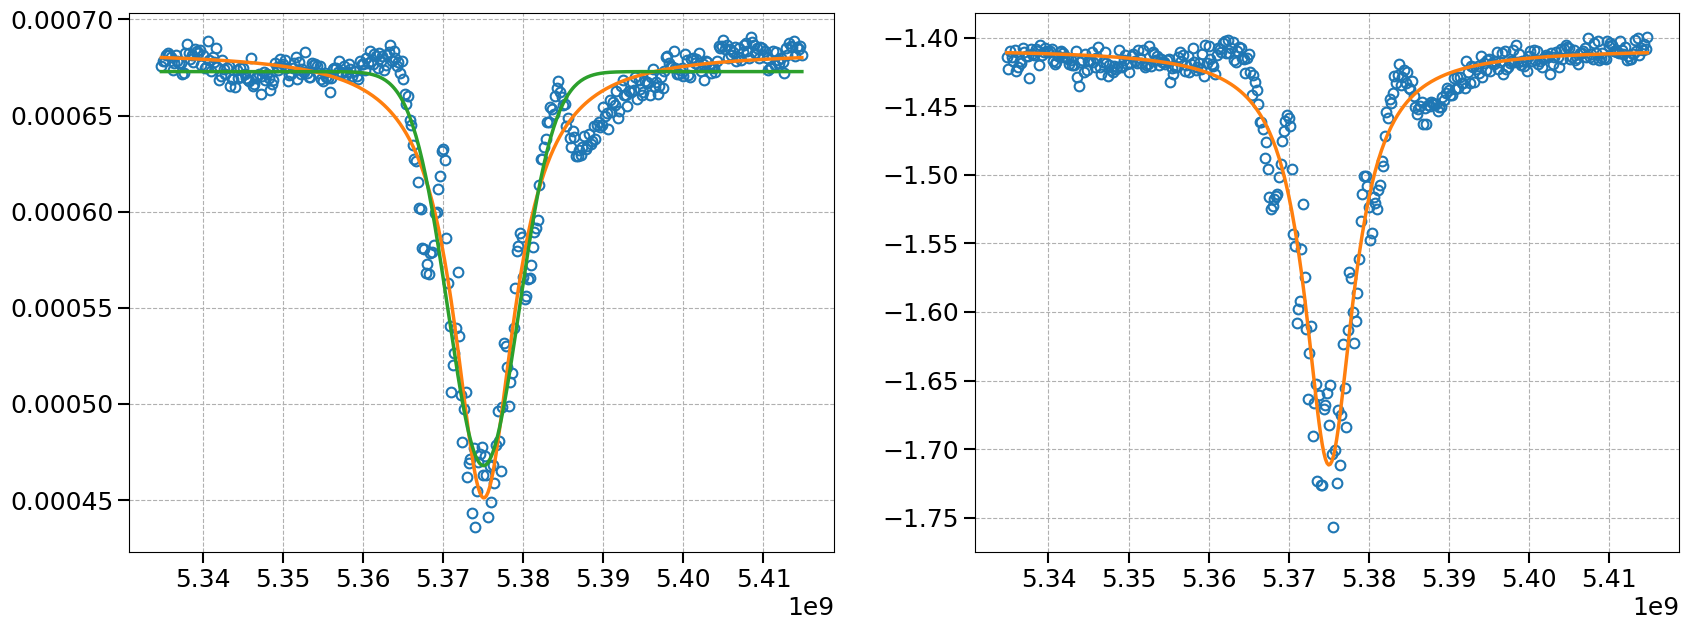

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))

fit_abs = sqil.fit.fit_lorentzian(freq, mag)
fit_phase = sqil.fit.fit_lorentzian(freq, uphase)
x_fit = np.linspace(freq[0], freq[1], 500)

fit_mag_gauss = sqil.fit.fit_gaussian(freq, mag)
fit_mag_gauss.summary()

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag, "o")
axs[0].plot(freq, fit_abs.predict(freq))
axs[0].plot(freq, fit_mag_gauss.predict(freq))

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_phase.predict(freq))

fit_abs.summary()
fit_phase.summary();

plt.show()

In [3]:
# x0, fwhm, peak_height, y0, is_peak
sqil.fit._guess.estimate_peak(freq, mag)

(np.float64(5375800000.0),
 np.float64(22600000.0),
 np.float64(0.00022663580137978066),
 np.float64(0.000670228708434473),
 False)

### Fit with mag noise

In [7]:
mag_noise = np.concatenate([mag[25:125], mag[:100], mag[10:110], mag[25:126]])
phase_noise = np.concatenate([uphase[25:125], uphase[:100], uphase[10:110], uphase[25:126]])

In [ ]:
import numpy as np
import sqil_core as sqil
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))


from analysis.fit import find_peaked_resonance

fit_res = find_peaked_resonance(freq, mag, uphase)
fit_res.summary()
print(f"Resonance: {sqil.format_number(fit_res.params_by_name['x0'], 6, unit="Hz", latex=False)}")

ModuleNotFoundError: No module named 'analysis'

Gaussian fit is better   ΔAIC = 5.0530
Lorentzian fit is better ΔAIC = -0.8060
Lorentzian domninates
 -> nrmse: 0.0982 vs 0.0852
nrmse       0.01111  GOOD
reduced χ²  1.018    GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A1      | -2251.39        | 177700         |  -7891.82 |
| fwhm1   |     1.94854e+07 |      1.082e+09 |   5552.02 |
| y01     |     0.000686049 |      0.00772   |   1125.28 |
| A2      |    -2.36716e+06 | 110000         |     -4.65 |
| fwhm2   |     1.54926e+07 | 569900         |      3.68 |
| y02     |    -1.41751     |      0.00543   |     -0.38 |
| x0      |     5.37501e+09 |  92090         |      0    |

Resonance: 5.37501 GHz


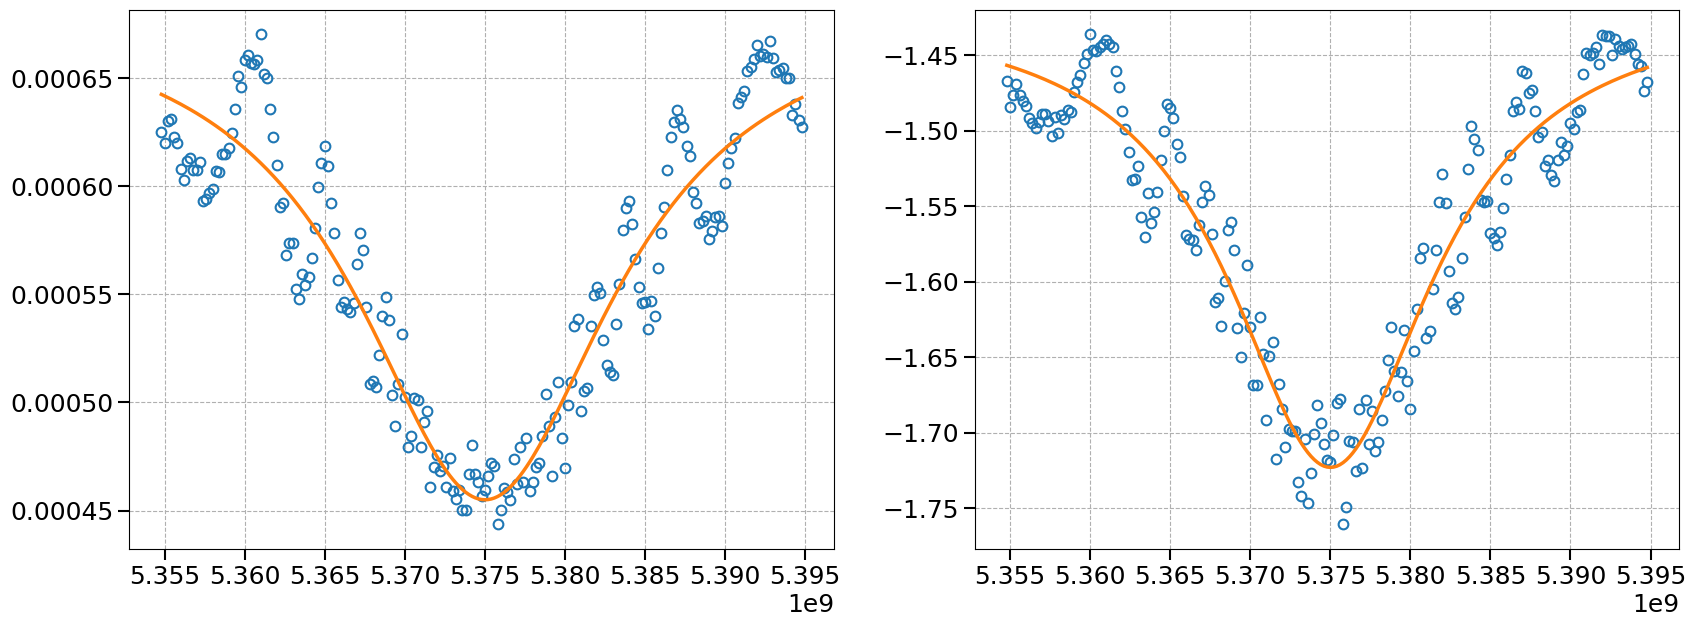

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00203-qubit_spectroscopy_2025-06-12T120132"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00207-qubit_spectroscopy_2025-06-12T120238"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))

fit_res = find_peaked_resonance(freq, mag, uphase)
fit_res.summary()

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag, "o")
axs[0].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[: len(freq)])

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[len(freq) :])

print(
    f"Resonance: {sqil.format_number(fit_res.params_by_name['x0'], 6, unit="Hz", latex=False)}"
)
plt.show()

In [79]:
y_data = mag
x0, fwhm, peak_height, y0, is_peak = sqil.fit.estimate_peak(freq, y_data)

peak_height / np.median(y_data)

np.float64(0.3799208416075699)

In [58]:
from scipy.signal import find_peaks


def robust_noise_std(y):
    """
    Robust estimator using Median Absolute Deviation (MAD),
    which is resilient to peaks.
    """
    med = np.median(y)
    mad = np.median(np.abs(y - med))
    return 1.4826 * mad  # Convert MAD to standard deviation


def estimate_snr_auto(y, prominence_factor=3):
    noise_std = robust_noise_std(y)
    peaks, props = find_peaks(y, prominence=prominence_factor * noise_std)
    if len(peaks) == 0:
        return 0.0
    peak_amp = props["prominences"].max()
    return peak_amp / noise_std


estimate_snr_auto(uphase)

np.float64(6.410587885707485)

In [ ]:
y = mag_noise

med = np.median(y)
mad = np.median(np.abs(y - med))

np.float64(0.005328883994463167)

nrmse       0.02824  GOOD
reduced χ²  1.009    GREAT
| Param   |     Fitted value |      STD error |      % Error |
|---------|------------------|----------------|--------------|
| A1      |      1.85668e+06 |      3.113e+13 |  1.67661e+09 |
| fwhm1   |     -3.4621e+09  |      1.933e+16 | -5.58455e+08 |
| y01     |     -0.000398275 |  11970         | -3.00479e+09 |
| A2      | 530768           | 145800         | 27.46        |
| fwhm2   |      1.79366e+07 |      5.48e+06  | 30.55        |
| y02     |     -1.46487     |      0.003937  | -0.27        |
| x0      |      5.34423e+09 |      1.419e+06 |  0.03        |



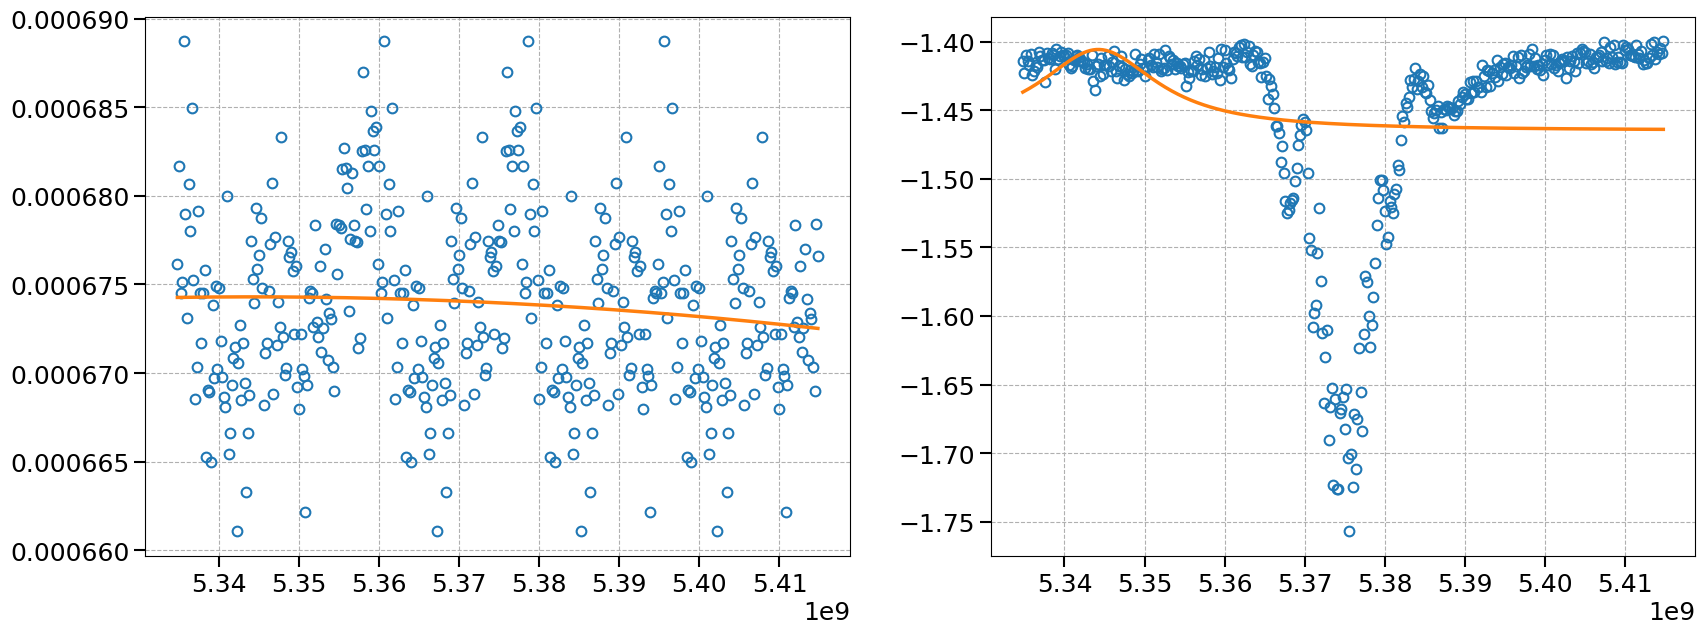

In [ ]:
fit_both = sqil.fit.fit_two_lorentzians_shared_x0(freq, mag_noise, freq, uphase)
fit_both.summary();

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag_noise, "o")
axs[0].plot(freq, fit_both.predict(freq, freq, *fit_both.params)[: len(freq)])

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_both.predict(freq, freq, *fit_both.params)[len(freq) :])

plt.show()

### Test fit function

In [ ]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

mag = np.abs(data)
uphase = np.unwrap(np.angle(data))

fit_both = sqil.fit.fit_two_lorentzians_shared_x0(freq, mag, freq, uphase)

fit_both.summary();

nrmse       0.01111  GOOD
reduced χ²  1.018    GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A1      | -2251.39        | 177700         |  -7891.82 |
| fwhm1   |     1.94854e+07 |      1.082e+09 |   5552.02 |
| y01     |     0.000686049 |      0.00772   |   1125.28 |
| A2      |    -2.36716e+06 | 110000         |     -4.65 |
| fwhm2   |     1.54926e+07 | 569900         |      3.68 |
| y02     |    -1.41751     |      0.00543   |     -0.38 |
| x0      |     5.37501e+09 |  92090         |      0    |



nrmse       0.01111  GOOD
reduced χ²  1.018    GREAT
| Param   |    Fitted value |      STD error |   % Error |
|---------|-----------------|----------------|-----------|
| A1      | -2251.39        | 177700         |  -7891.82 |
| fwhm1   |     1.94854e+07 |      1.082e+09 |   5552.02 |
| y01     |     0.000686049 |      0.00772   |   1125.28 |
| A2      |    -2.36716e+06 | 110000         |     -4.65 |
| fwhm2   |     1.54926e+07 | 569900         |      3.68 |
| y02     |    -1.41751     |      0.00543   |     -0.38 |
| x0      |     5.37501e+09 |  92090         |      0    |



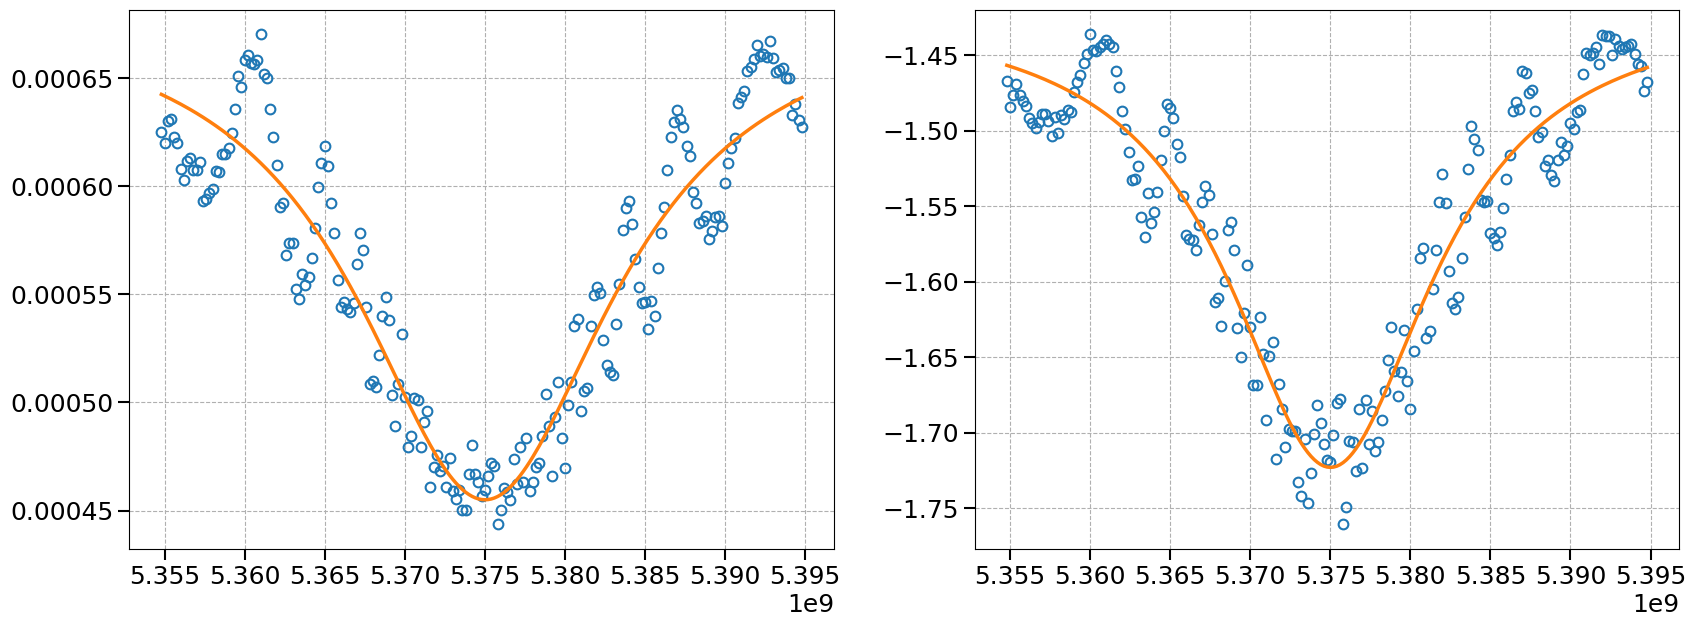

In [3]:
from sqil_core.fit import fit_input, fit_output
from scipy.optimize import curve_fit
from sqil_core.fit._models import lorentzian
from sqil_core.fit._guess import lorentzian_guess, lorentzian_bounds
import numpy as np
import matplotlib.pyplot as plt


def lorentzian(x, A, x0, fwhm, y0):
    return A * (np.abs(fwhm) / 2) / ((x - x0) ** 2 + (fwhm**2 / 4)) + y0


def combined_lorentzian(x1, x2, A1, fwhm1, y01, A2, fwhm2, y02, x0):
    y1 = lorentzian(x1, A1, x0, fwhm1, y01)
    y2 = lorentzian(x2, A2, x0, fwhm2, y02)
    return np.concatenate([y1, y2])


@fit_input
@fit_output
def fit_two_lorentzians_shared_x0(
    x_data_1,
    y_data_1,
    x_data_2,
    y_data_2,
    guess: list = None,
    bounds: list[tuple[float]] | tuple = (-np.inf, np.inf),
):
    y_all = np.concatenate([y_data_1, y_data_2])

    if guess == None:
        guess_1 = lorentzian_guess(x_data_1, y_data_1)
        guess_2 = lorentzian_guess(x_data_2, y_data_2)
        x01, x02 = guess_1[1], guess_2[1]
        x0 = np.mean([x01, x02])
        guess = np.concatenate([np.delete(guess_1, 1), np.delete(guess_2, 1), [x0]])

    if bounds == (-np.inf, np.inf):
        bounds = [[None] * len(guess), [None] * len(guess)]
        lower_guess_1, upper_guess_1 = lorentzian_bounds(x_data_1, y_data_1, guess_1)
        lower_guess_2, upper_guess_2 = lorentzian_bounds(x_data_2, y_data_2, guess_2)
        # Combine bounds for 1 and 2
        lower_guess = np.concatenate(
            [
                np.delete(lower_guess_1, 1),
                np.delete(lower_guess_2, 1),
                [np.min([lower_guess_1, lower_guess_2])],
            ]
        )
        upper_guess = np.concatenate(
            [
                np.delete(upper_guess_1, 1),
                np.delete(upper_guess_2, 1),
                [np.max([upper_guess_1, upper_guess_2])],
            ]
        )
        bounds = (lower_guess, upper_guess)

    res = curve_fit(
        lambda _, A1, fwhm1, y01, A2, fwhm2, y02, x0: combined_lorentzian(
            x_data_1, x_data_2, A1, fwhm1, y01, A2, fwhm2, y02, x0
        ),
        xdata=np.zeros_like(y_all), # dummy x, since x1 and x2 are fixed via closure
        ydata=y_all,
        p0=guess,
        # bounds=bounds,
        full_output=True
    )

    return res, {
            "param_names": ["A1", "fwhm1", "y01", "A2", "fwhm2", "y02", "x0"],
            "predict": combined_lorentzian,
            "fit_output_vars": { "x_data": np.concatenate([x_data_1, x_data_2]), "y_data": y_all }
        }

fit_res = fit_two_lorentzians_shared_x0(freq, mag, freq, uphase)
fit_res.summary();

sqil.set_plot_style(plt)
fig, axs = plt.subplots(1, 2)

axs[0].plot(freq, mag, "o")
axs[0].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[:len(freq)])

axs[1].plot(freq, uphase, "o")
axs[1].plot(freq, fit_res.predict(freq, freq, *fit_res.params)[len(freq):])
# axs[1].plot(freq, fit_phase.predict(freq))

plt.show()

2025-06-17 08:14:56,043 - INFO - Successfully connected to zi
c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\setup/setup_test.py:53: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  return generate_device_setup(


[2025.06.17 08:14:56.055] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.06.17 08:14:56.057] INFO    VERSION: laboneq 2.53.0
[2025.06.17 08:14:56.059] INFO    Connecting to data server at localhost:8004
[2025.06.17 08:14:56.062] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.17 08:14:56.070] INFO    Configuring the device setup
[2025.06.17 08:14:56.077] INFO    The device setup is configured


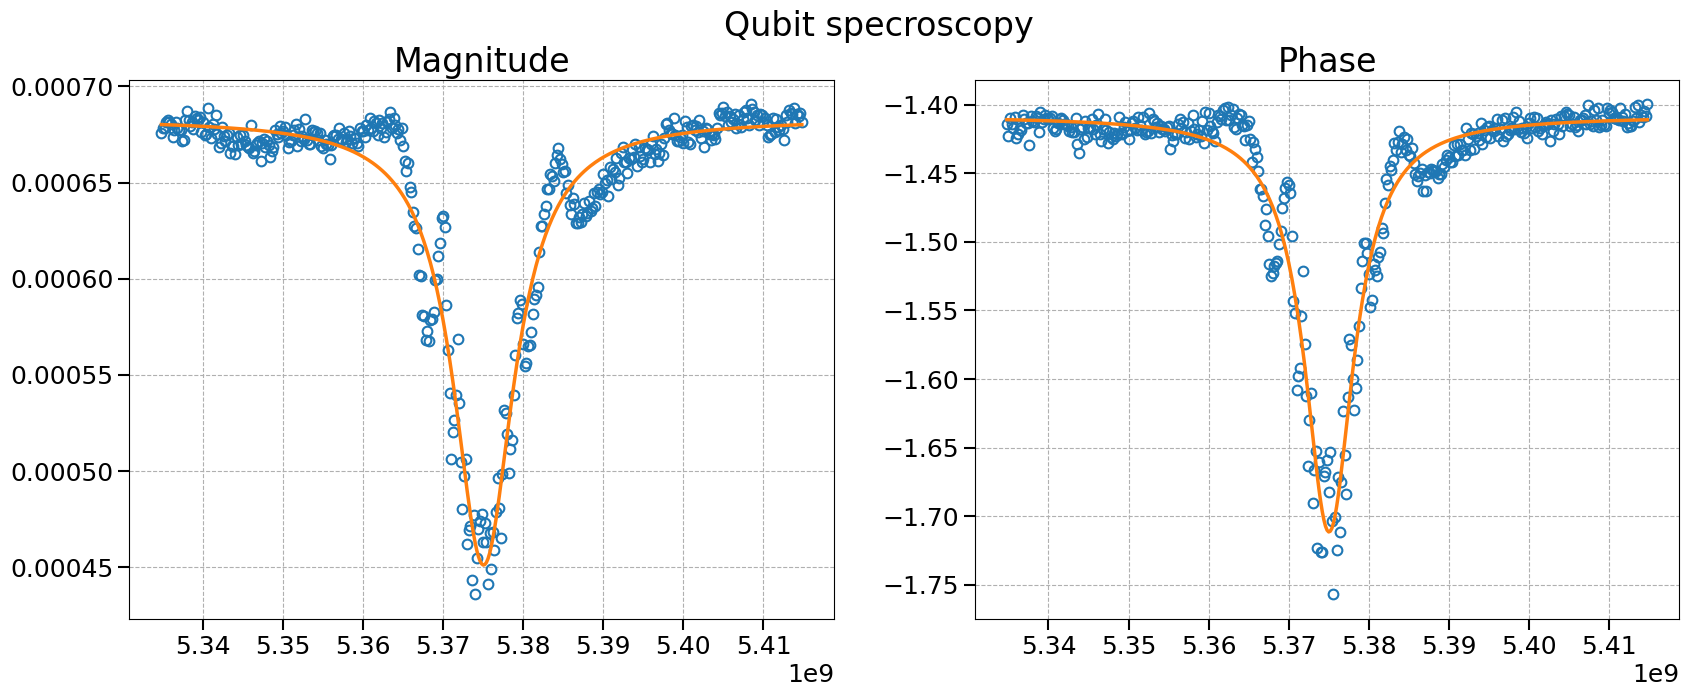

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode

# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00149-qubit_spectroscopy_2025-06-12T083050"
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00204-qubit_spectroscopy_2025-06-12T120200"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00203-qubit_spectroscopy_2025-06-12T120132"
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\test\2025-06-12\00207-qubit_spectroscopy_2025-06-12T120238"

qu_freq = 5.3748e9

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 1000
options.averaging_mode = AveragingMode.CYCLIC

# result = qu_spec.run(
#     np.linspace(qu_freq - 40e6, qu_freq + 40e6, 401),
#     # sweeps={"spectroscopy_amplitude": np.linspace(0,1,5)},
#     options=options,
# )

qu_spec.analyze(path)
plt.show()